# <font color=#5462C8>Test technique Equancy</font>
## <font color=#5462C8>Adrien Schockaert</font>

This notebook contains my results for the technical test for Equancy. I hope you will appreciate my work, I can't wait to discuss about it with you. 

### <font color=#5462C8>Import des dépendences</font>

In [220]:
#Run this cell to make sure the notebook dependencies are present in the environment
! pip install -r requirements.txt

In [447]:
#import of the needed librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import plotly.express as px

### <font color=#5462C8>Import des données et découverte des données</font>

In [448]:
#We load the dataset inside a dataframe and visualize its head thanks to pandas
df = pd.read_csv("data.csv")
df.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master          1   
1                          Python/Java/Scala/MongoDB  Master          3   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master          3   
3                                  C/C++/Java/Python  Master        1,5   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd        NaN   

       Ville  
0      Paris  
1  Marseille  
2     Nantes  
3  Marseille  
4   Bordeaux

In [449]:
#The df.dtypes() method gives informations about which kind of data are located in each columns of the dataset
df.dtypes

Entreprise      object
Metier          object
Technologies    object
Diplome         object
Experience      object
Ville           object
dtype: object

We see on the above result that all the columns contains data of type **"object"** which is the pandas type for string. <br >
It is not a problem to have data of type object but in the case of the column *Experience*, which contains numerical information, it isn't optimal.<br >
This is the reason why in the following cell, we change this column type into a numeric one. For that we first replace each coma by a point as pandas does not recongnize numbers with coma. Then we change the type.

In [450]:
#The following line is taking the strings inside the "Experience" columns and turning them in floats
df['Experience'] = df['Experience'].str.replace(',', '').astype(float)
df.dtypes

Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object

In [451]:
#We print the len of df to have a better idea of how many observations are in the dataframe
print(len(df))
#df.describe is used to provide a statistical description of the dataset
df.describe(include="all")

9582


Entreprise          Metier            Technologies Diplome  \
count             9565            9563                    9582    9582   
unique            1382               4                      57       4   
top     Ball Aerospace  Data scientist  SQL/R/Python//Big data  Master   
freq               748            3865                     539    4971   
mean               NaN             NaN                     NaN     NaN   
std                NaN             NaN                     NaN     NaN   
min                NaN             NaN                     NaN     NaN   
25%                NaN             NaN                     NaN     NaN   
50%                NaN             NaN                     NaN     NaN   
75%                NaN             NaN                     NaN     NaN   
max                NaN             NaN                     NaN     NaN   

         Experience  Ville  
count   9488.000000   9582  
unique          NaN     14  
top             NaN  Paris  
freq            NaN   2015  
mean       9.786151    NaN  
std       10.897305    NaN  
min        0.000000    NaN  
25%        2.000000    NaN  
50%        5.000000    NaN  
75%       15.000000    NaN  
max       35.000000    NaN

In order to perform our analysis and our predictions, we need to get rid of the unwanted missing values.<br >
To do so, we visualize them with seaborn and we will get rid of them using pandas.

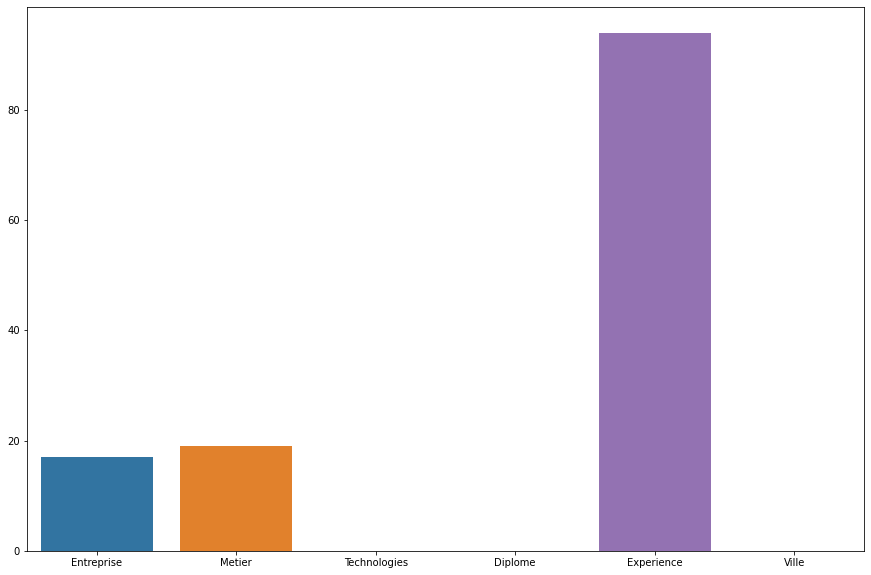

In [452]:
missing_values = [df[name].isna().sum() for name in df.columns] # missing_values contains the number of NaN values within each column
figsize = (15,10)
plt.figure(figsize=figsize)
sns.barplot(x=df.columns, y=missing_values) 
plt.show()

In [453]:
#To know exactly how many missing values are present in the dataset, we print them
for c,n in zip(list(df.columns), missing_values):
    print(f"There are {n} missing values in {c}")

There are 17 missing values in Entreprise
There are 19 missing values in Metier
There are 0 missing values in Technologies
There are 0 missing values in Diplome
There are 94 missing values in Experience
There are 0 missing values in Ville


## <font color=#5462C8>Question 1</font>
There are 9582 observations in the dataset. However, some columns contains missing values
- There are 17 missing values in Entreprise
- There are 19 missing values in Metier
- There are 94 missing values in Experience

## <font color=#5462C8>Question 2</font>

Filling missing values can be useful if we don't want to get rid of observations. Nevertheless, the method chosen to do so should be chosen wisely after analysis of the dataset. For the sake of this test, we chose to fill the missing values for data scientists with the median experience for data scientists and mean for data engineer. We first check how many nan values there are for data scientists and data engineer and then proceed with the filling

In [454]:
roles = ["Data scientist", "Data engineer"]
for role in roles:
    missing = df[df["Metier"]==role]["Experience"].isna().sum()
    print(f"There are {missing} missing values within {role}")

There are 32 missing values within Data scientist
There are 20 missing values within Data engineer


In [455]:
#Data scientist
median = df.loc[(df['Metier'] == "Data scientist")]["Experience"].median()
df[df["Metier"]=="Data scientist"] = df[df["Metier"]=="Data scientist"].fillna({"Experience":median})

#Data engineer
mean = df.loc[(df['Metier'] == "Data engineer")]["Experience"].mean()
df[df["Metier"]=="Data engineer"] = df[df["Metier"]=="Data engineer"].fillna({"Experience":mean})


In [456]:
roles = ["Data scientist", "Data engineer"]
for role in roles:
    missing = df[df["Metier"]==role]["Experience"].isna().sum()
    print(f"There are now {missing} missing values within {role}")

There are now 0 missing values within Data scientist
There are now 0 missing values within Data engineer


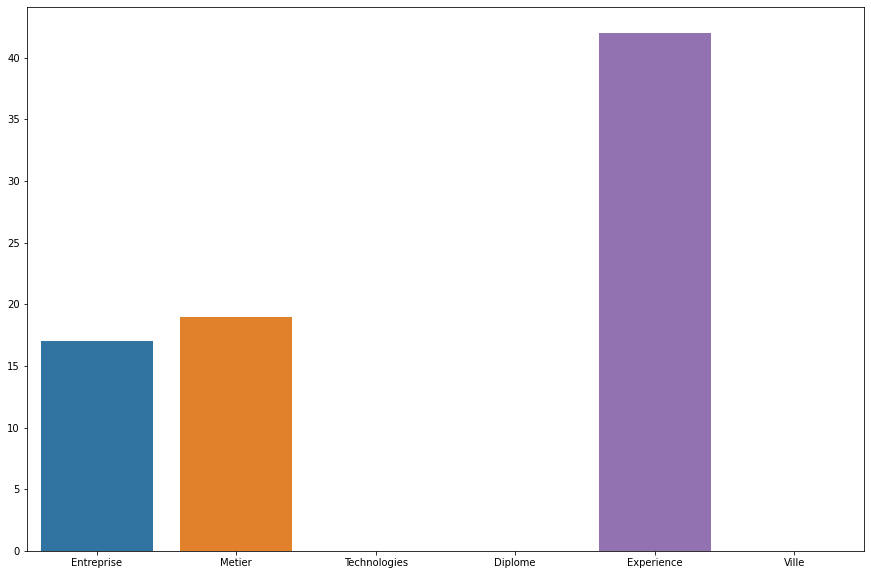

In [457]:
missing_values = [df[name].isna().sum() for name in df.columns] # missing_values contains the number of NaN values within each column
figsize = (15,10)
plt.figure(figsize=figsize)
sns.barplot(x=df.columns, y=missing_values) 
plt.show()

## <font color=#5462C8>Questions 3 & 4</font>
In order to compare the years of experience within each occupation, we will compare their average.<br > 
First we compute them thanks to **pandas**, then we visualize and compare them using **plotly**.

In [458]:

for role in set(list(df["Metier"].values)):
    if str(role)!="nan":
        average = df[df["Metier"]==role]["Experience"].mean()
        print(f"The average experience in years for {role} is {average}")

The average experience in years for Data architecte is 9.977619047619047
The average experience in years for Lead data scientist is 13.575682382133994
The average experience in years for Data scientist is 8.410090556274255
The average experience in years for Data engineer is 9.86549204984959


In [459]:
fig = px.bar(
    data_frame=df.groupby(['Metier']).mean().reset_index(), 
    x="Metier", 
    y="Experience",
    color ="Metier",
    title="Mean of experience for each position"
)
fig.update_yaxes(title="Average experience in year")
fig.show()

## <font color=#5462C8>Questions 5</font>


In order to change the *Experience* column in a categorical column of 4 categories, we first visualize its boxplot.<br >
It will help us define thresholds which will define the four categories. For that, we use the quartiles.

In [460]:
#The following code plots the boxplot of the experience
df_exp = df[df["Experience"].notna()]["Experience"]
fig = px.box(data_frame=df_exp,
    title="Boxplot of the experience in years")
fig.update_yaxes(title="Année")
fig.show()

In [461]:
#We first create the new columns
df["Exp_label"] = "Débutant"
df.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome  Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                          Python/Java/Scala/MongoDB  Master         3.0   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                  C/C++/Java/Python  Master        15.0   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         5.0   

       Ville Exp_label  
0      Paris  Débutant  
1  Marseille  Débutant  
2     Nantes  Débutant  
3  Marseille  Débutant  
4   Bordeaux  Débutant

In [462]:
#We then create the 4 categories
labels = ["Débutant", "Confirmé", "Avancé", "Expert"]
quartiles = [df["Experience"].quantile(i) for i in np.arange(0.25,1, 0.25)]
for i in range(len(df)):
    experience = df["Experience"][i]
    for label,quartile in zip(labels,quartiles):
        if experience>=quartile:
            df["Exp_label"][i] = label
df = df.drop(['Experience'], axis='columns')
df.head()

/var/folders/t3/4nf4869143s1cpmjxtpcsj0r0000gn/T/ipykernel_94782/1800571235.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome      Ville  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master      Paris   
1                          Python/Java/Scala/MongoDB  Master  Marseille   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master     Nantes   
3                                  C/C++/Java/Python  Master  Marseille   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd   Bordeaux   

  Exp_label  
0  Débutant  
1  Débutant  
2  Débutant  
3    Avancé  
4  Confirmé

## <font color=#5462C8>Questions 6</font>
To determine what are the top  5 technologies in our dataframe, we need to deal with the following issue.<br >
The *Technologies* column contains a list of of values but we saw that its type is string. If we want to count the values, we need to change the content of the column into proper lists and iterate through it. 



In [463]:
#This function is changeing the content of df columns to turn them into lists
def turn_into_list(list_):
    list_ = list_.replace('/', '","')
    list_ = ''.join(('["', list_, '"]'))
    return list_

In [464]:
#We now change each observation type to list and check the result(only for the head)
df["Technologies"]=df["Technologies"].apply(turn_into_list).apply(eval)
for i, l in enumerate(df["Technologies"].head()):
 print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>


In [465]:
"""
This function is turning the Technologies column in a 1D series 
and use value_counts() to compute the number of presence of each technology
"""
def count_techno_values(df, technology="all"):
    oneD_df = pd.Series([x for _list in df for x in _list])
    if technology == "all":
        return pd.Series([x for _list in df for x in _list]).value_counts().sort_values()
    else:
        return pd.Series([x for _list in df for x in _list]).value_counts()[technology]

In [466]:
#We can now print the top 5
top5 = count_techno_values(df["Technologies"]).head(15)
print(top5)


Ruby             35
Perl             74
Windows          75
ORACLE           94
MySQL            94
Hadoop(HDFS)     98
NoSQ            123
Redshift        124
numpy           140
anglais         145
PySpark         145
HBASE           155
PIG             155
Map-Reduce      155
Yarn            206
dtype: int64


## <font color=#5462C8>Question 6 - réponses</font>
The 5 most used technologies are the following :
- The **Python** technology appears 6627 time in the dataset
- The **R** technology appears 4374 time in the dataset
- The **SQL** technology appears 2581 time in the dataset
- The **Java** technology appears 1719 time in the dataset
- The **Hadoop** technology appears 1589 time in the dataset

## <font color=#5462C8>Question 7</font>

Our goal here is to clusteries the different technological profiles. For that we will use a TfidVectorizer that will put a weight on each technology known by the person.<br >
After that we will use the **silhouette score** to determine the best number of cluster<br >
Once that is done, we visualize our result by plotting the top words within each cluster and by plotting wordMap.

In [467]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import matplotlib.cm      as cm

In [468]:
#vectorisation of the list of technologies
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Technologies'].apply(' '.join).to_list())
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())
final_df = tf_idf
final_df.head()

9582 rows


ai  anglais  aws  azure  big  cassandra  data  deep  docker  \
0  0.0      0.0  0.0    0.0  0.0        0.0   0.0   0.0     0.0   
1  0.0      0.0  0.0    0.0  0.0        0.0   0.0   0.0     0.0   
2  0.0      0.0  0.0    0.0  0.0        0.0   0.0   0.0     0.0   
3  0.0      0.0  0.0    0.0  0.0        0.0   0.0   0.0     0.0   
4  0.0      0.0  0.0    0.0  0.0        0.0   0.0   0.0     0.0   

   elasticsearch  ...  spark     spss       sql  tableau  tensorflow  \
0            0.0  ...    0.0  0.00000  0.000000      0.0    0.428399   
1            0.0  ...    0.0  0.00000  0.000000      0.0    0.000000   
2            0.0  ...    0.0  0.49181  0.265502      0.0    0.393261   
3            0.0  ...    0.0  0.00000  0.000000      0.0    0.000000   
4            0.0  ...    0.0  0.00000  0.000000      0.0    0.390642   

   teradata  vba  vertica  windows  yarn  
0  0.000000  0.0      0.0      0.0   0.0  
1  0.000000  0.0      0.0      0.0   0.0  
2  0.431047  0.0      0.0      0.0   0.0  
3  0.000000  0.0      0.0      0.0   0.0  
4  0.000000  0.0      0.0      0.0   0.0  

[5 rows x 57 columns]

In [576]:
#Method to run kmeans several time
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = sk.cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

#Method which plot the silhouette score 
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = sk.metrics.silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
#Method which compute the silhouette score        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = sk.metrics.silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

/var/folders/t3/4nf4869143s1cpmjxtpcsj0r0000gn/T/ipykernel_94782/731342673.py:12: ConvergenceWarning:

Number of distinct clusters (53) found smaller than n_clusters (54). Possibly due to duplicate points in X.

/var/folders/t3/4nf4869143s1cpmjxtpcsj0r0000gn/T/ipykernel_94782/731342673.py:12: ConvergenceWarning:

Number of distinct clusters (53) found smaller than n_clusters (55). Possibly due to duplicate points in X.

/var/folders/t3/4nf4869143s1cpmjxtpcsj0r0000gn/T/ipykernel_94782/731342673.py:12: ConvergenceWarning:

Number of distinct clusters (53) found smaller than n_clusters (56). Possibly due to duplicate points in X.

/var/folders/t3/4nf4869143s1cpmjxtpcsj0r0000gn/T/ipykernel_94782/731342673.py:12: ConvergenceWarning:

Number of distinct clusters (53) found smaller than n_clusters (57). Possibly due to duplicate points in X.

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was

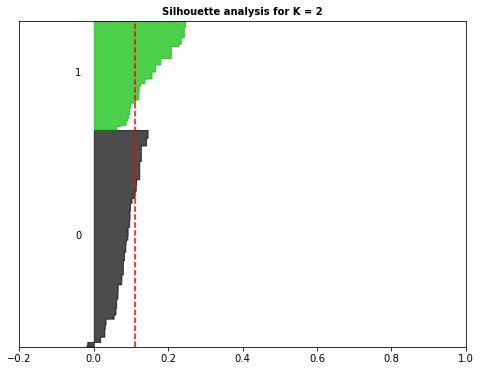

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



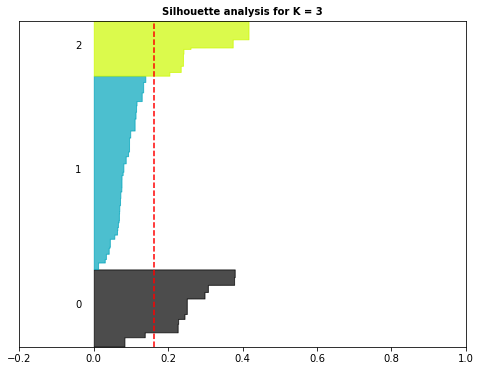

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



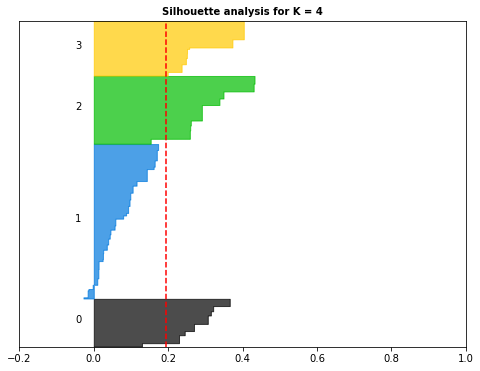

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



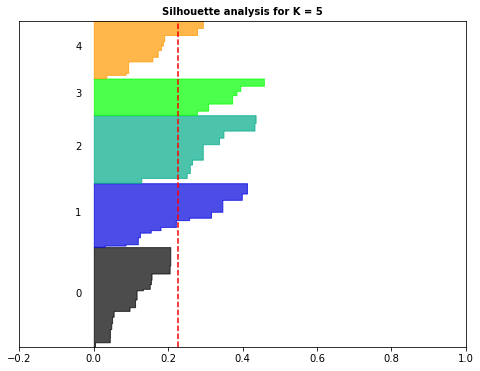

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



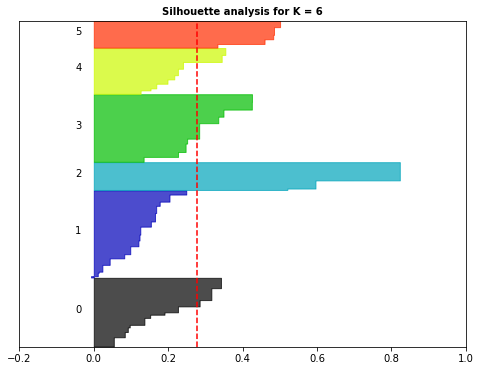

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



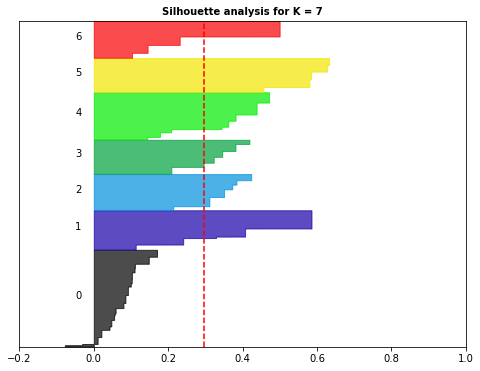

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



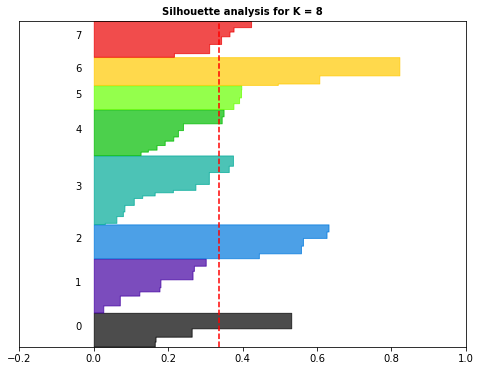

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



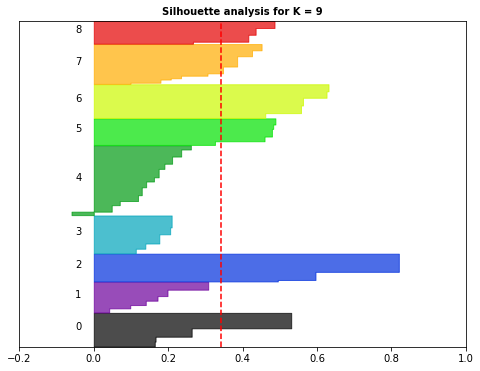

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



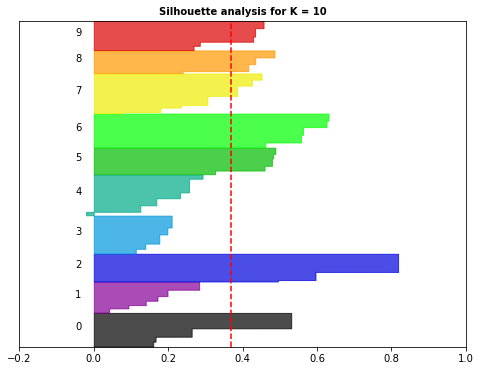

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



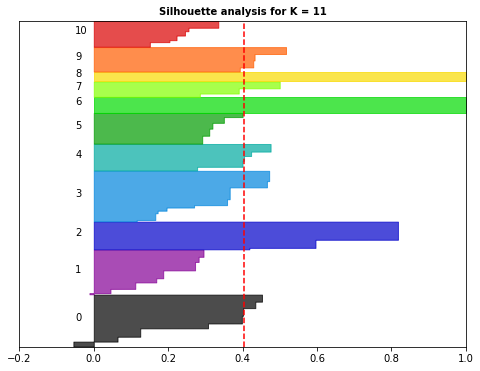

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



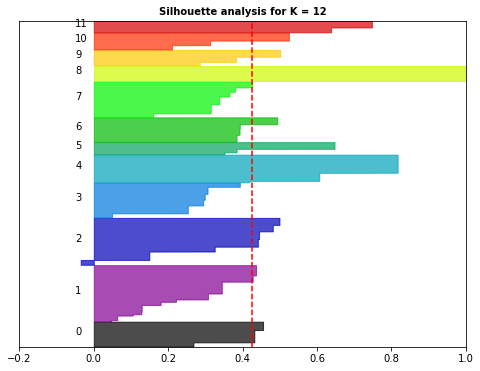

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



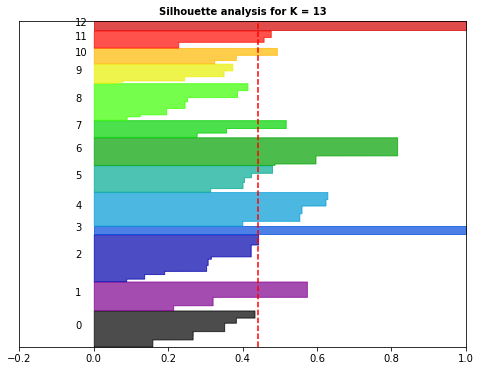

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



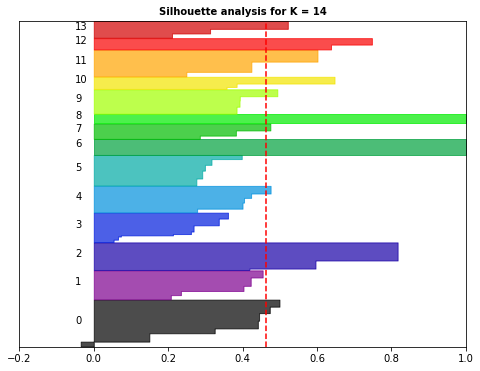

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



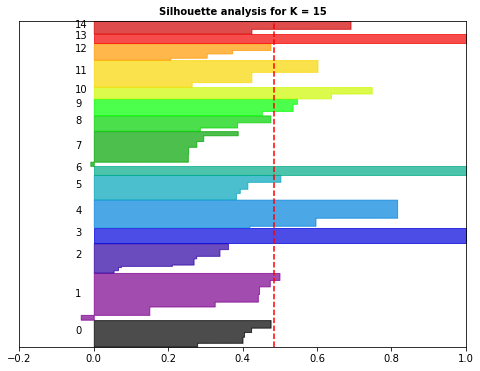

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



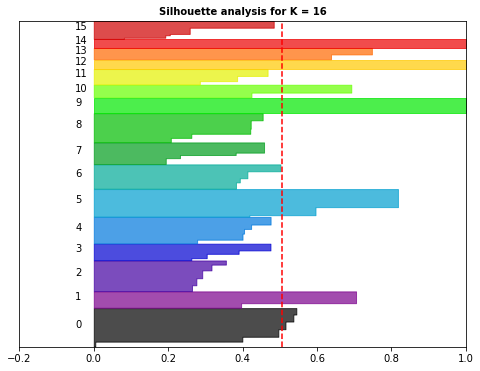

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



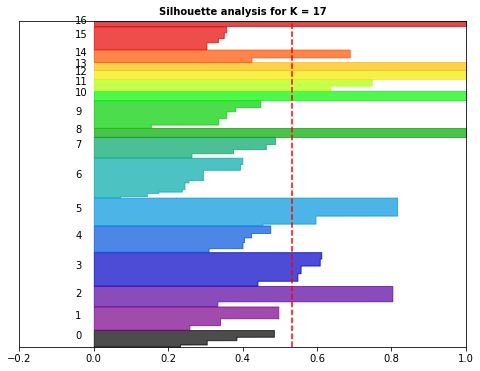

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



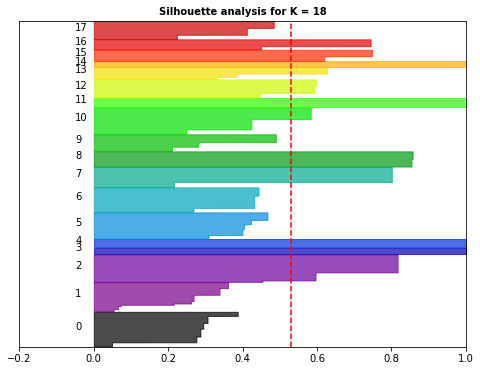

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



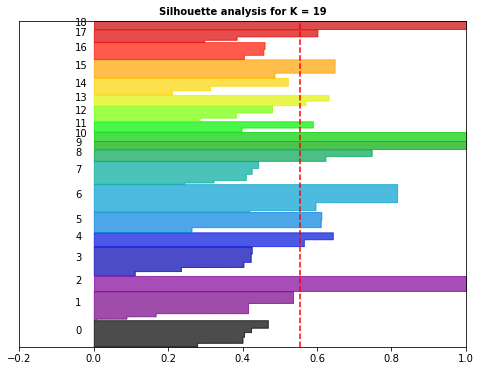

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



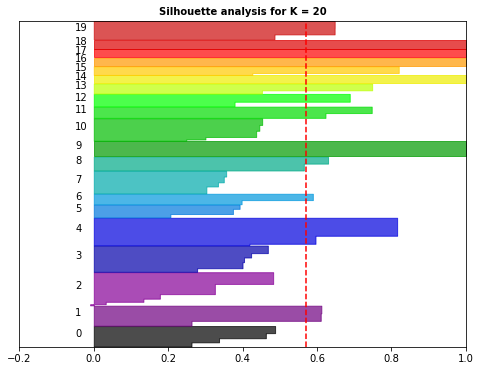

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



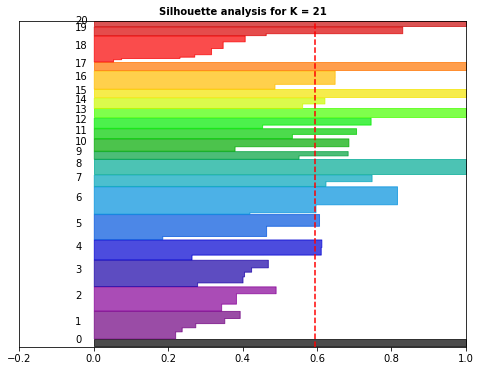

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



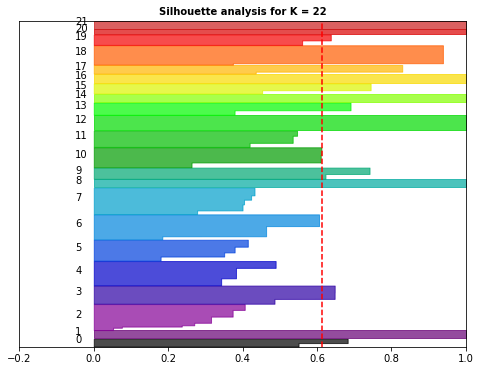

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



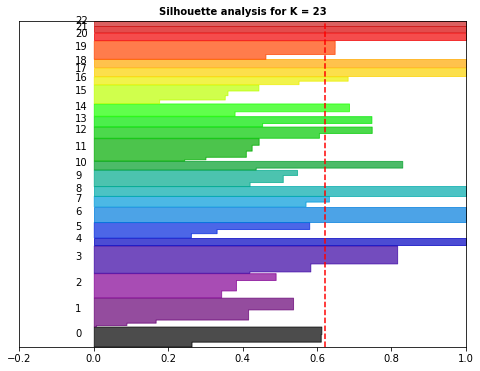

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



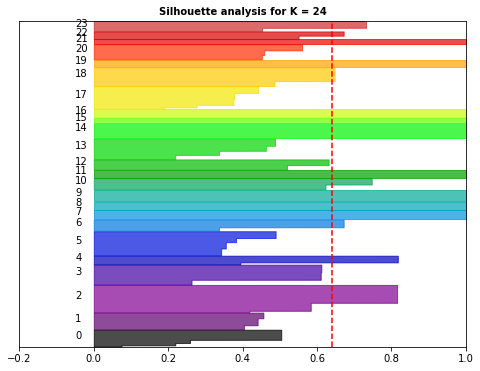

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



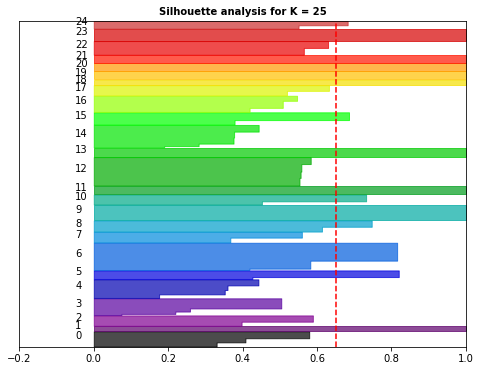

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



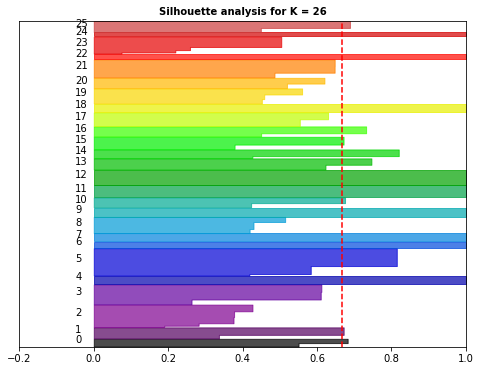

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



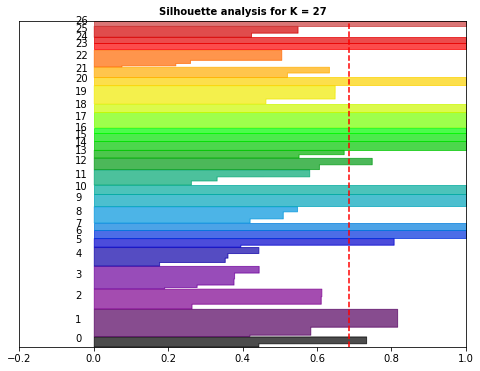

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



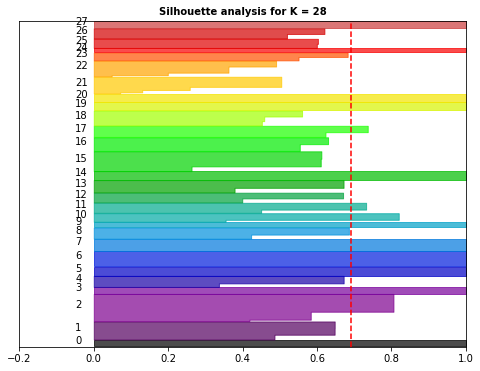

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



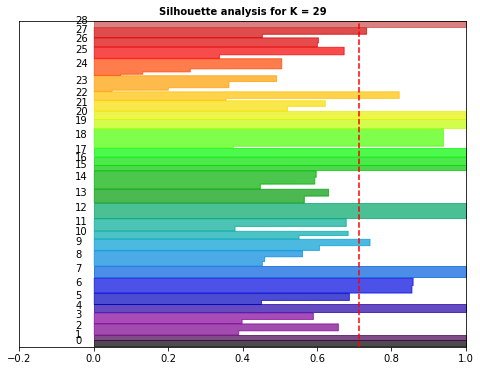

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



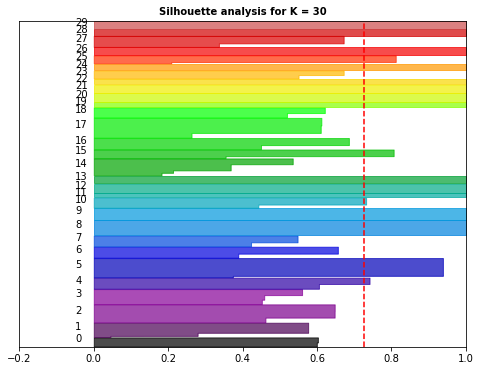

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



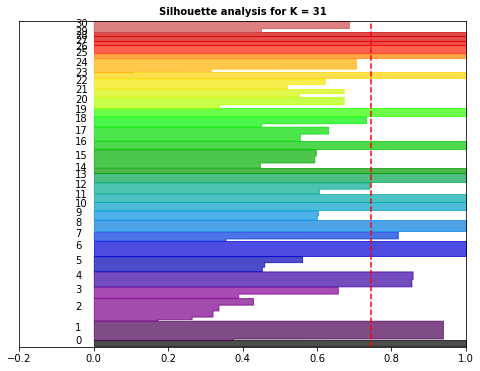

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



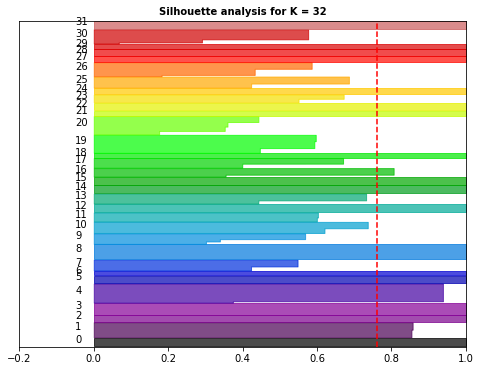

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



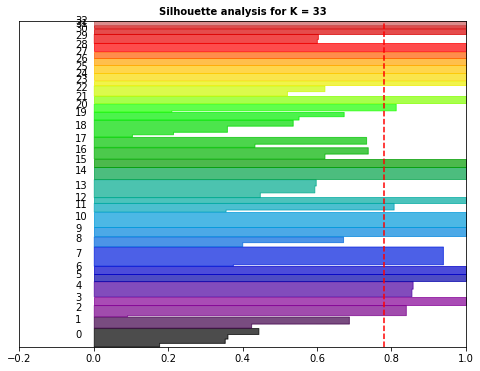

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



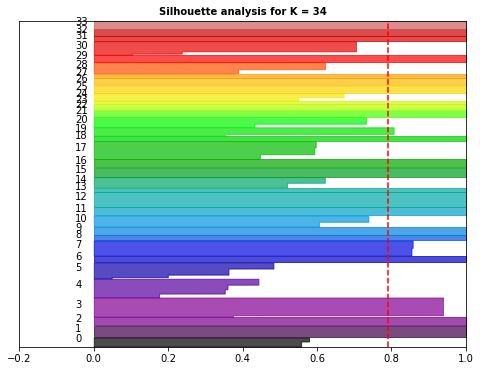

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



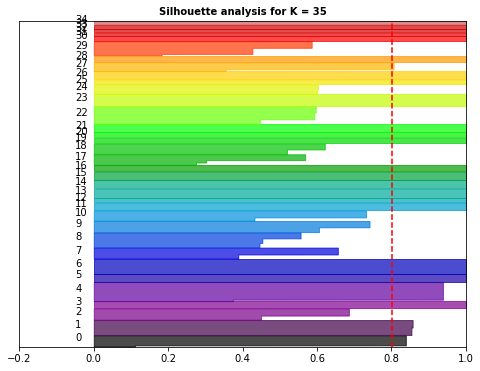

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



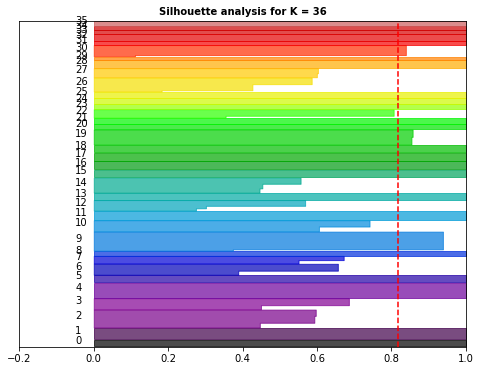

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



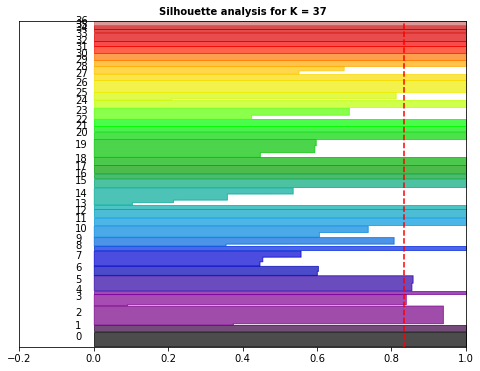

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



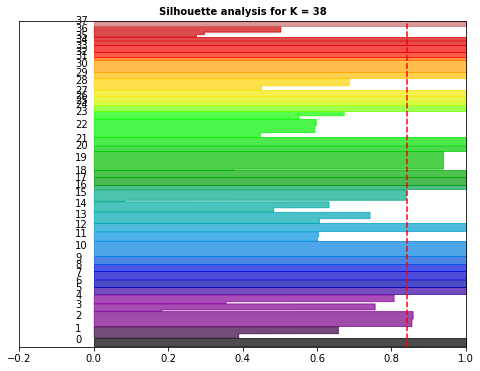

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



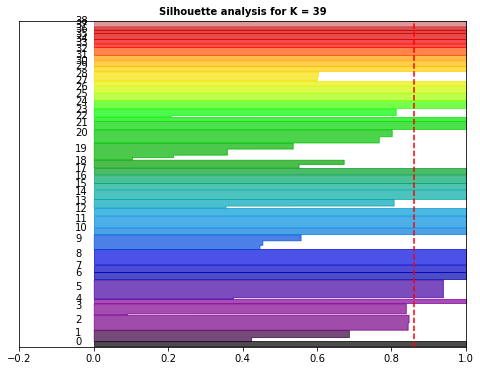

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



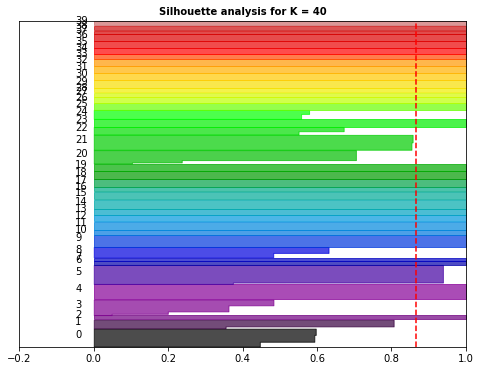

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



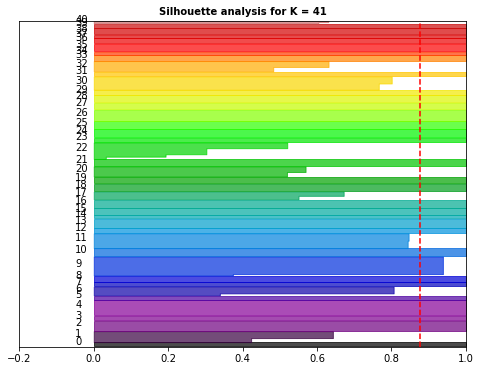

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



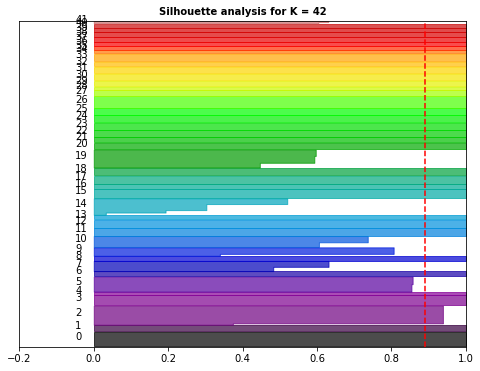

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



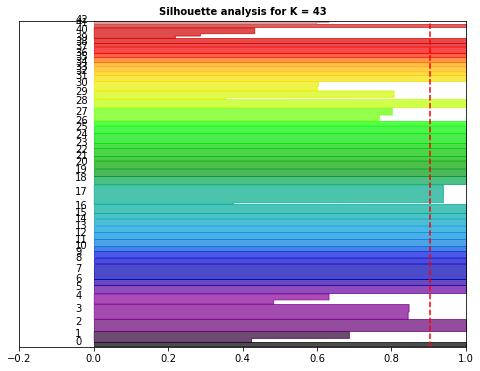

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



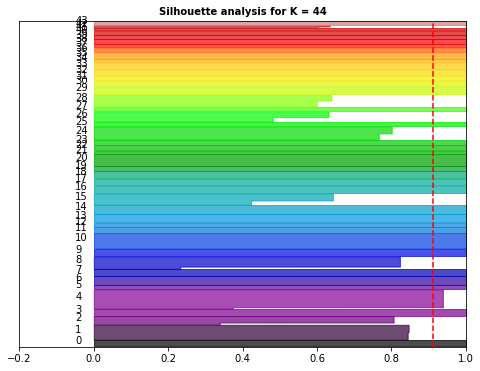

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



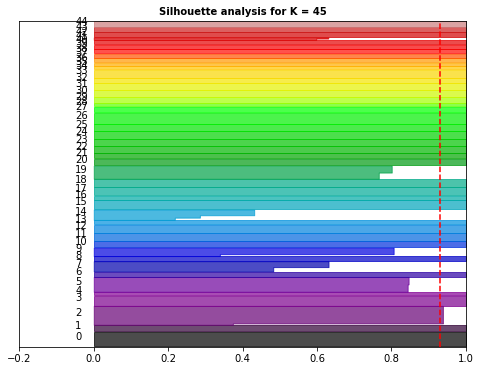

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



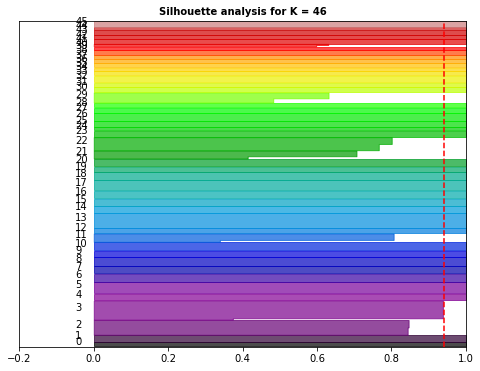

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



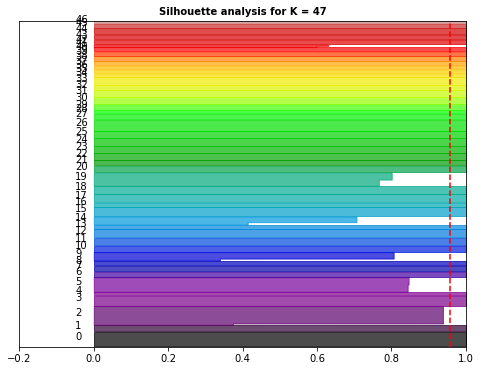

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



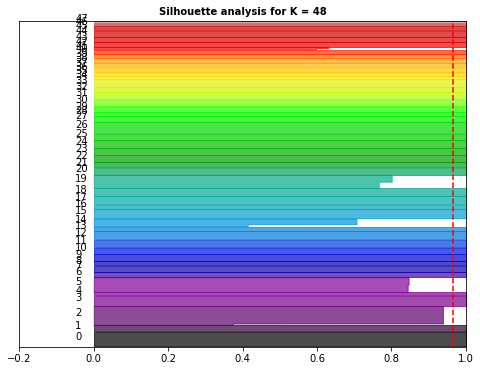

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



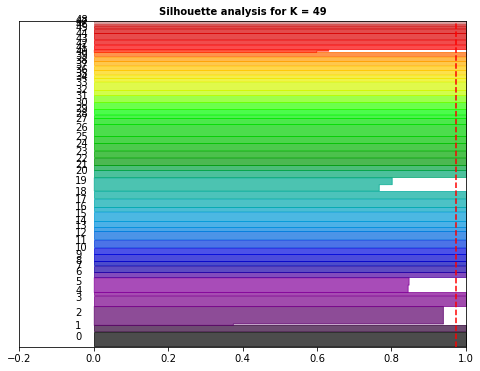

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



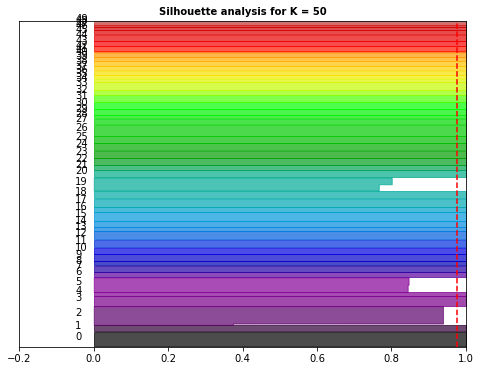

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



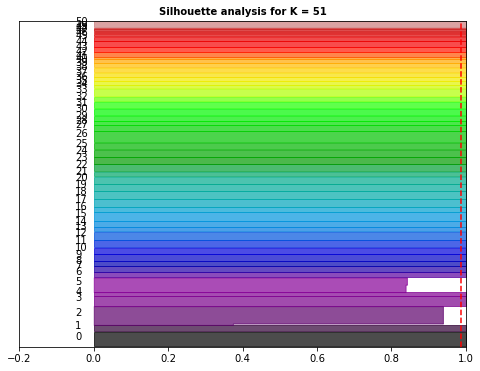

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



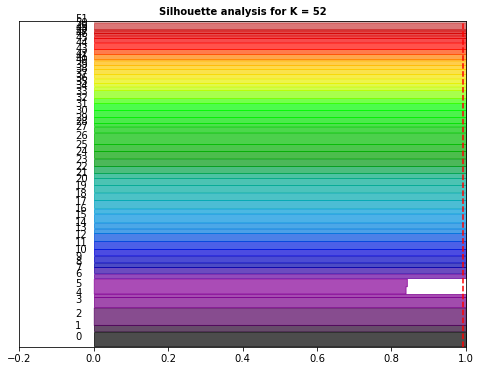

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



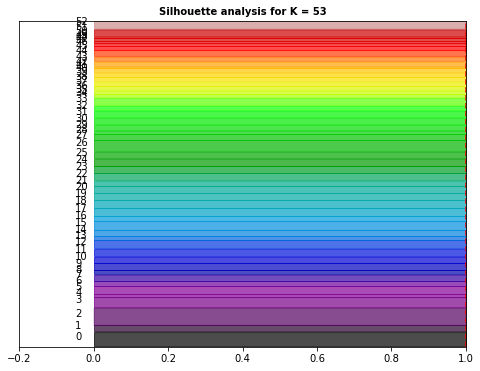

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



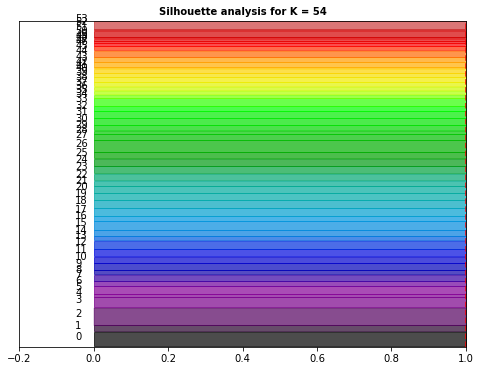

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



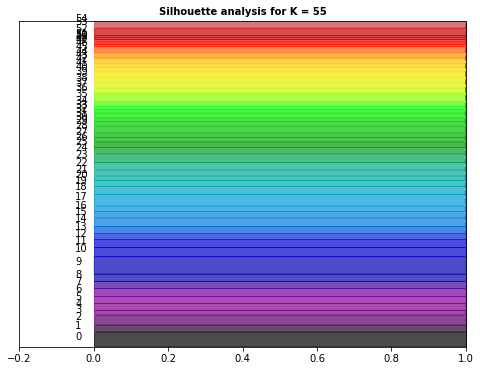

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



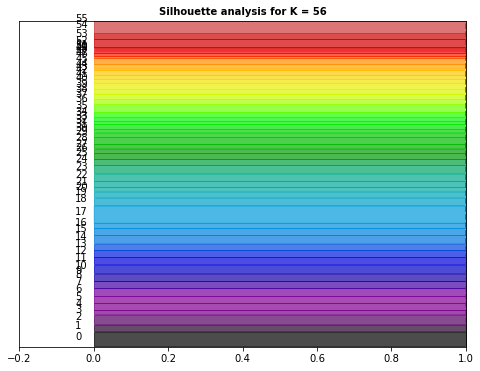

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



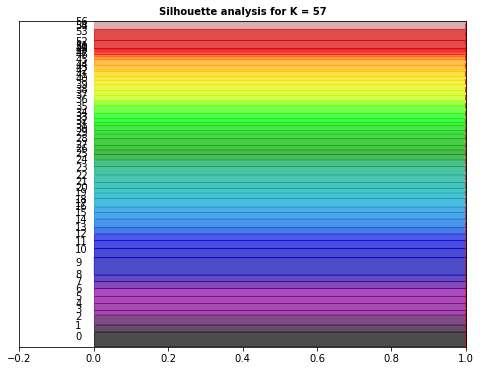

In [422]:
# iteratind Kmeans to find the best k value
k = 57
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

In [577]:
#Method which gets and plot the top words in clusters

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/Users/adrienschockaert/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



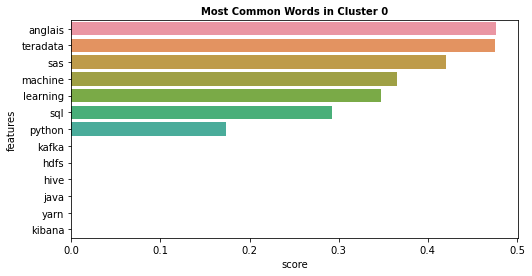

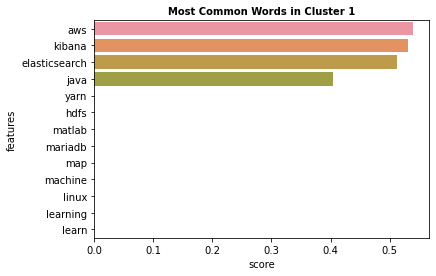

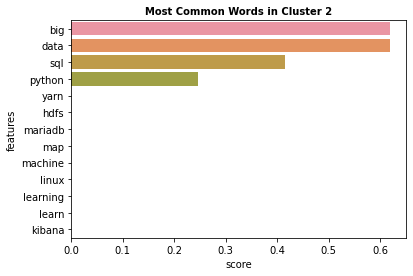

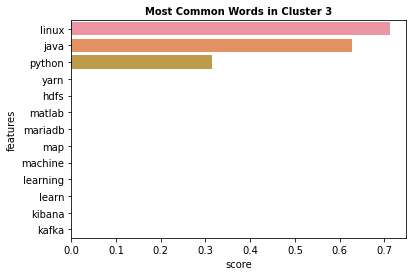

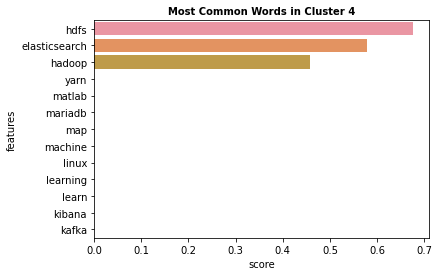

In [492]:
#Thanks to silhouette score we realized that the best k number was 53. We run it and plot the words located in the clusters
best_result = 53
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs[:5], 13)

In [470]:
# Method which ransforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

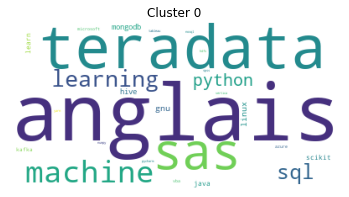

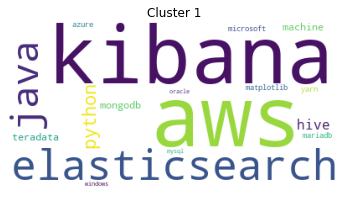

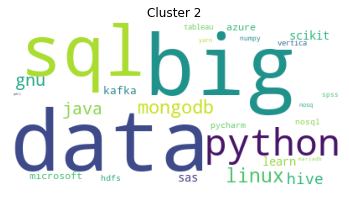

In [491]:
from wordcloud import WordCloud
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids[:3])

In [500]:
df["cluster_technologique"] = prediction


Metier                   object
Diplome                  object
Ville                    object
Exp_label                object
cluster_technologique     int32
dtype: object

Thanks to the clustering the "Technologies" columns can now be used for a prediction problem. That is the aim of the following question. 

## <font color=#5462C8>Questions 3 & 4</font>

Several classification models used supervized learning and they all have their advantages. In our case we will use the RandomForest. However, we first need to prepare the data. We need to change the type of our data and make them numeric ones, then we need to isolate the "Metier" because it is what we want to guess. Finally we need to split the dataset between two samples, the training one and the testing one.

In [587]:
#We will work with the following dataframe
df_formated = df[df["Metier"].notna()].copy().drop(['Entreprise', 'Technologies'], axis='columns')
df_formated.head()
df_formated.dtypes

Metier                   object
Diplome                  object
Ville                    object
Exp_label                object
cluster_technologique     int32
dtype: object

In [588]:
#The labelEncoder changes categories into numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df_formated.columns:
    if df_formated[column].dtype == "object":
        df_formated[column] = encoder.fit_transform(df_formated[column])
df_formated.dtypes


Metier                   int64
Diplome                  int64
Ville                    int64
Exp_label                int64
cluster_technologique    int32
dtype: object

In [590]:
X= df_formated.drop(['Metier'], axis='columns')
y = df_formated["Metier"]
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7650, 4)
Training Labels Shape: (1913, 4)
Testing Features Shape: (7650,)
Testing Labels Shape: (1913,)


In [591]:
from sklearn.ensemble import RandomForestClassifier
logreg_clf = RandomForestClassifier()
logreg_clf.fit(X_train, y_train)
log_preds = logreg_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, log_preds))

Accuracy: 0.7945635128071092


In [593]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7950862519602718

## Results

We obtained an accuracy of almost **80%**. That is an okayish result, that woudl deserves more time to be improve.<br >
In order to have a better understanding of the results, we will see wich features were more important (bigger weight) and we will plot the confusion matrix.

In [594]:
feature_imp = pd.Series(logreg_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

cluster_technologique    0.774680
Ville                    0.118261
Diplome                  0.081073
Exp_label                0.025986
dtype: float64

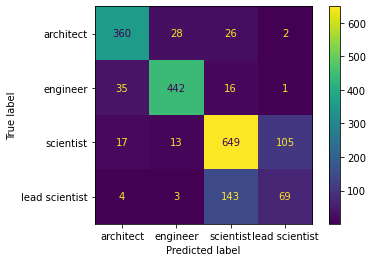

In [613]:

confusion_matrix = sk.metrics.confusion_matrix(y_test, log_preds)
cm_display = sk.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["architect", "engineer","scientist","lead scientist"])
cm_display.plot()
plt.show()

We can see on the confusion matrix that the model did great for all the occupation, except from lead data scientist.<br >
Indeed, most of them are recognized as data scientist, this shows that with our data, we can't really differ one from another. <br >
We will now predict the occupation we don't know yet.

In [600]:
unknown_jobs = df[df["Metier"].isna()].drop(['Technologies', 'Entreprise','Metier'], axis='columns')

In [601]:
encoder = LabelEncoder()
for column in unknown_jobs.columns:
    if unknown_jobs[column].dtype == "object":
        unknown_jobs[column] = encoder.fit_transform(unknown_jobs[column])
unknown_jobs

Diplome  Ville  Exp_label  cluster_technologique
346         2      4          0                     25
2058        1      2          0                     50
2670        1      6          0                     26
2899        3      1          2                     24
3346        1      5          1                     37
4248        3      2          2                     10
4290        3      6          0                      0
4292        1      0          1                      0
5425        2      2          1                     29
5593        1      2          2                      5
5712        0      4          2                     17
6024        1      2          0                     49
6625        2      4          2                     17
7091        1      3          2                      0
7228        1      0          0                     21
7330        3      2          1                     32
9087        2      4          0                     17
9427        1      3          2                      5
9490        1      3          2                     11

In [609]:
jobs = pipe.predict(unknown_jobs)
jobs = jobs.astype(str)
for i,job in enumerate(jobs):
    if job == "0":
        jobs[i]="Data architecte"
    if job == "1":
        jobs[i]="Data engineer"
    if job == "2":
        jobs[i]="Data scientist"
    if job == "3":
        jobs[i]="Lead data scientist"
jobs

array(['Data engineer', 'Data scientist', 'Data scientist',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Data scientist', 'Lead data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data engineer',
       'Data architecte', 'Data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Data scientist'], dtype='<U21')